In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('my_courses.csv')

In [3]:
df.head()

,titreCours,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
0,Réalisez_une_analyse_exploratoire_de_données,0.0,19.0,0.0,15.0,2.0,19.0,1.0,2.0,135.0,4525281.0
1,Initiez-vous_au_marketing_digital,9.0,0.0,0.0,10.0,1.0,13.0,1.0,3.0,38.0,3013816.0
2,Simplifiez-vous_le_CSS_avec_Sass,12.0,8.0,0.0,15.0,2.0,21.0,1.0,3.0,10.0,6106181.0
3,Réalisez_des_calculs_distribués_sur_des_donnée...,107.0,44.0,0.0,20.0,2.0,15.0,1.0,2.0,386.0,4297166.0
4,Créez_une_application_web_avec_Vue.js,71.0,50.0,0.0,15.0,2.0,21.0,1.0,4.0,10.0,6390311.0


## Données centrées réduites

In [4]:
df.dtypes

titreCours              object
inscription            float64
progression            float64
moyenneDeClasse        float64
duree                  float64
difficulte             float64
nbChapitres            float64
ratioQuizEvaluation    float64
nbEvaluations          float64
derniereMiseAJour      float64
idCours                float64
dtype: object

In [6]:
for c in df.columns:
    if c != 'titreCours':
        df[c] = (df[c]- df[c].mean())/df[c].std() 

In [19]:
# Supprimé la ligne 52
df.drop([52], inplace=True)

In [23]:
# supprimer les NAN
df.dropna(axis=1, inplace=True)

In [24]:
df.head()

,titreCours,inscription,progression,duree,difficulte,nbChapitres,nbEvaluations,derniereMiseAJour,idCours
0,Réalisez_une_analyse_exploratoire_de_données,-1.678336,-0.661820,0.019951,0.504191,0.238493,-0.200204,-0.212895,0.379100
1,Initiez-vous_au_marketing_digital,-1.649411,-1.133253,-0.412324,-1.038040,-0.342833,0.543410,-0.690369,-0.507288
2,Simplifiez-vous_le_CSS_avec_Sass,-1.639769,-0.934755,0.019951,0.504191,0.432268,0.543410,-0.828197,1.306207
3,Réalisez_des_calculs_distribués_sur_des_donnée...,-1.334449,-0.041513,0.452226,0.504191,-0.149058,-0.200204,1.022632,0.245323
4,Créez_une_application_web_avec_Vue.js,-1.450149,0.107361,0.019951,0.504191,0.432268,1.287023,-0.828197,1.472833


## Calcul des composantes principales

In [26]:
from  sklearn import decomposition, preprocessing

In [57]:
pca = decomposition.PCA( n_components=8 )
X_scaled = preprocessing.StandardScaler().fit_transform( df.iloc[:, 1:] )

In [58]:
X_projected = pca.fit_transform( df.iloc[:, 1:] )

In [59]:
pd.DataFrame(X_projected, index=df.index, columns=['axe' + str(i+1)  for i in range(8)])

,axe1,axe2,axe3,axe4,axe5,axe6,axe7,axe8
0,-0.417049,-0.945468,-1.364223,0.509652,-0.737236,0.207565,-0.124642,-0.067814
1,-1.083676,-1.197161,-0.435242,-0.805973,-1.527456,-0.161335,0.632239,0.440093
2,-0.676386,-2.091494,-1.113280,0.405606,-0.237468,0.238950,-0.558055,-0.175459
3,-0.136491,0.179061,-1.246297,0.476340,-0.494967,0.944268,-0.426921,0.509616
4,-0.571901,-2.154700,-0.097989,0.779981,-0.129866,0.907894,-0.790729,-0.115471
5,2.998093,-0.136286,2.493351,-1.844685,-0.545254,-0.043492,0.187403,0.322699
6,0.237224,-1.081211,-1.068568,0.590740,-0.729053,-0.111523,-0.459241,-0.183226
7,3.502082,-0.985628,-2.056590,0.579013,-1.530369,-0.064532,0.547732,0.153099
8,-0.153841,-0.624141,-1.550060,-0.622999,-0.356288,1.218483,-0.320923,-0.301972
9,-1.936936,-1.506024,0.951691,0.176206,-0.332831,0.689880,-0.889589,0.063283


In [84]:
f1 = pca.components_[0]

In [61]:
f1

array([ 0.30562599,  0.03919647,  0.53942633,  0.37193843,  0.51559177,
        0.1069067 ,  0.04736451, -0.44297868])

In [62]:
f2 = pca.components_[1]

In [63]:
f2

array([ 0.29623348,  0.3211181 , -0.08959014, -0.13701742, -0.1801981 ,
       -0.55040592,  0.61224573, -0.26845085])

In [64]:
f3 = pca.components_[2]

In [65]:
f3

array([ 0.41336256,  0.62122087, -0.11218268, -0.39551337, -0.02630632,
        0.41026671, -0.31060491, -0.09334902])

In [66]:
f4 = pca.components_[3]

In [67]:
f4

array([-0.29385927,  0.62348662,  0.10872329,  0.51231141, -0.11637008,
       -0.33249188, -0.31480632,  0.16562477])

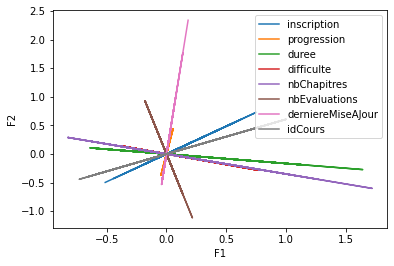

In [56]:
plt.plot( f1*df.iloc[:, 1:],  f2*df.iloc[:, 1:]);
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend([ 'inscription', 'progression', 'duree', 'difficulte',
       'nbChapitres', 'nbEvaluations', 'derniereMiseAJour', 'idCours'])


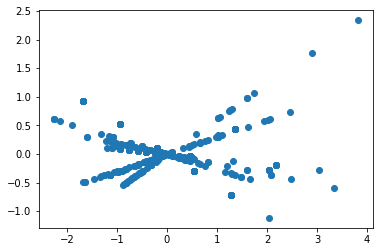

In [83]:
plt.scatter( df.iloc[:, 1:],  f2*df.iloc[:, 1:]) 

## Les variables les plus corrélées à F1 sont :

In [92]:
for i in range(8):
    if f1[i] > 0.3:
        print("{1} : {0:.3f}".format(f1[i], df.columns[i]))


titreCours : 0.306
progression : 0.539
duree : 0.372
difficulte : 0.516


## Les variables les plus corrélées à F2 sont :

In [93]:
for i in range(8):
    if f2[i] > 0.3:
        print("{1} : {0:.3f}".format(f2[i], df.columns[i]))

inscription : 0.321
nbEvaluations : 0.612


## Les variables les plus corrélées à F3 sont :

In [95]:
for i in range(8):
    if f2[i] > 0.3:
        print("{1} : {0:.3f}".format(f3[i], df.columns[i]))

inscription : 0.621
nbEvaluations : -0.311


In [99]:
pca = decomposition.FCA()

AttributeError: module 'sklearn.decomposition' has no attribute 'FCA'

In [100]:
pca = decomposition.FactorAnalysis??

In [ ]:
pca = decomposition.FactorAnalysis

In [103]:
fca = decomposition.FactorAnalysis( n_components=8 )
X_scaled2 = preprocessing.StandardScaler().fit_transform( df.iloc[:, 1:] )

In [104]:
fca

FactorAnalysis(n_components=8)

In [118]:
fca

FactorAnalysis(n_components=8)